# Analysis of North Carolina's Rate of Bullet Ballots 
### (Ballots that only have a vote for US PRESIDENT, others empty). 
This analysis compares the amount of US President's votes to the amount of US House of Representatives's Votes per Precinct in North Carolina.

The data in this analysis has been taken from this source, but is also included in this repository:

    https://s3.amazonaws.com/dl.ncsbe.gov/ENRS/2020_11_03/results_pct_20241103.zip

In [53]:
import pandas as pd

from us_election_2024.helpers import read_data, unique, filter_for, total_votes_per_precinct, filter_isin, filter_multiindex_by_tuples, contains

## Load election data

In [54]:
df = read_data("../data/results_pct_20201103.txt")
df

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
0,TYRRELL,11/03/2020,3,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y,NaN
1,WAYNE,11/03/2020,06,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y,NaN
2,FORSYTH,11/03/2020,081,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y,NaN
3,NEW HANOVER,11/03/2020,W03,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y,NaN
4,MECKLENBURG,11/03/2020,241,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257716,DURHAM,11/03/2020,OS MSUMC,1085,S,NC DISTRICT COURT JUDGE DISTRICT 14 SEAT 07,Shamieka LaCher Rhinehart,DEM,1,0,5583,0,0,5583,N,NaN
257717,WAKE,11/03/2020,OSKD 121-128,7,C,WAKE COUNTY BOARD OF COMMISSIONERS DISTRICT 07,Faruk Okcetin,REP,1,0,0,0,0,0,N,NaN
257718,EDGECOMBE,11/03/2020,1202,1373,S,US PRESIDENT,Jade Simmons (Write-In),NaN,1,0,0,0,0,0,Y,NaN
257719,AVERY,11/03/2020,ONE STOP,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,0,3735,0,0,3735,N,NaN


# Extract House of Representatives data
Sum up total amount of votes for house of representatives per precinct in North Carolina.

In [55]:
df_house = contains(df, "Contest Name", "US HOUSE OF REPRESENTATIVES")
df_house = df_house.groupby(["County", "Precinct"])[["Absentee by Mail", "Total Votes"]].sum()
df_house

Absentee by Mail  Total Votes
County   Precinct                               
ALAMANCE 01                     411         2878
         02                     394         2935
         035                    592         3283
         03C                    425         2016
         03N                    578         2477
...                             ...          ...
YANCEY   07 BRU                  43          322
         08 CRA                 250         1984
         09 SOU                 284         1537
         10 PEN                  55          445
         11 PRI                 115          982

[3065 rows x 2 columns]

# Extract Presidential Election data
Sum up total presidential votes per precinct.

In [56]:
df_pres = contains(df, "Contest Name", "US PRESIDENT")
df_pres = df_pres.groupby(["County", "Precinct"])[["Absentee by Mail", "Total Votes"]].sum()
df_pres

Absentee by Mail  Total Votes
County   Precinct                               
ALAMANCE 01                     414         2907
         02                     403         2972
         035                    603         3328
         03C                    431         2034
         03N                    593         2525
...                             ...          ...
YANCEY   07 BRU                  42          325
         08 CRA                 253         2000
         09 SOU                 288         1555
         10 PEN                  55          451
         11 PRI                 112          982

[3065 rows x 2 columns]

# Merge presidential and house election data per precinct

In [57]:
total = pd.merge(df_house, df_pres, left_index=True, right_index=True, suffixes=[" House", " President"])
total

Absentee by Mail House  Total Votes House  \
County   Precinct                                              
ALAMANCE 01                           411               2878   
         02                           394               2935   
         035                          592               3283   
         03C                          425               2016   
         03N                          578               2477   
...                                   ...                ...   
YANCEY   07 BRU                        43                322   
         08 CRA                       250               1984   
         09 SOU                       284               1537   
         10 PEN                        55                445   
         11 PRI                       115                982   

                   Absentee by Mail President  Total Votes President  
County   Precinct                                                     
ALAMANCE 01                               414                   2907  
         02                               403                   2972  
         035                              603                   3328  
         03C                              431                   2034  
         03N                              593                   2525  
...                                       ...                    ...  
YANCEY   07 BRU                            42                    325  
         08 CRA                           253                   2000  
         09 SOU                           288                   1555  
         10 PEN                            55                    451  
         11 PRI                           112                    982  

[3065 rows x 4 columns]

# Calculate the difference in presidential and house votes

In [58]:
total["Difference"] = total["Total Votes President"] - total["Total Votes House"]
total

Absentee by Mail House  Total Votes House  \
County   Precinct                                              
ALAMANCE 01                           411               2878   
         02                           394               2935   
         035                          592               3283   
         03C                          425               2016   
         03N                          578               2477   
...                                   ...                ...   
YANCEY   07 BRU                        43                322   
         08 CRA                       250               1984   
         09 SOU                       284               1537   
         10 PEN                        55                445   
         11 PRI                       115                982   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               414                   2907   
         02                               403                   2972   
         035                              603                   3328   
         03C                              431                   2034   
         03N                              593                   2525   
...                                       ...                    ...   
YANCEY   07 BRU                            42                    325   
         08 CRA                           253                   2000   
         09 SOU                           288                   1555   
         10 PEN                            55                    451   
         11 PRI                           112                    982   

                   Difference  
County   Precinct              
ALAMANCE 01                29  
         02                37  
         035               45  
         03C               18  
         03N               48  
...                       ...  
YANCEY   07 BRU             3  
         08 CRA            16  
         09 SOU            18  
         10 PEN             6  
         11 PRI             0  

[3065 rows x 5 columns]

# Calculate the rate of bullet ballots

In [59]:
total["Bullet Ballots %"] = 100.0 * total.Difference / total["Total Votes President"]
total 

Absentee by Mail House  Total Votes House  \
County   Precinct                                              
ALAMANCE 01                           411               2878   
         02                           394               2935   
         035                          592               3283   
         03C                          425               2016   
         03N                          578               2477   
...                                   ...                ...   
YANCEY   07 BRU                        43                322   
         08 CRA                       250               1984   
         09 SOU                       284               1537   
         10 PEN                        55                445   
         11 PRI                       115                982   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               414                   2907   
         02                               403                   2972   
         035                              603                   3328   
         03C                              431                   2034   
         03N                              593                   2525   
...                                       ...                    ...   
YANCEY   07 BRU                            42                    325   
         08 CRA                           253                   2000   
         09 SOU                           288                   1555   
         10 PEN                            55                    451   
         11 PRI                           112                    982   

                   Difference  Bullet Ballots %  
County   Precinct                                
ALAMANCE 01                29          0.997592  
         02                37          1.244953  
         035               45          1.352163  
         03C               18          0.884956  
         03N               48          1.900990  
...                       ...               ...  
YANCEY   07 BRU             3          0.923077  
         08 CRA            16          0.800000  
         09 SOU            18          1.157556  
         10 PEN             6          1.330377  
         11 PRI             0          0.000000  

[3065 rows x 6 columns]

# Get rid of precincts with zero votes

In [60]:
total = total[total["Total Votes President"] != 0]
total

Absentee by Mail House  Total Votes House  \
County   Precinct                                              
ALAMANCE 01                           411               2878   
         02                           394               2935   
         035                          592               3283   
         03C                          425               2016   
         03N                          578               2477   
...                                   ...                ...   
YANCEY   07 BRU                        43                322   
         08 CRA                       250               1984   
         09 SOU                       284               1537   
         10 PEN                        55                445   
         11 PRI                       115                982   

                   Absentee by Mail President  Total Votes President  \
County   Precinct                                                      
ALAMANCE 01                               414                   2907   
         02                               403                   2972   
         035                              603                   3328   
         03C                              431                   2034   
         03N                              593                   2525   
...                                       ...                    ...   
YANCEY   07 BRU                            42                    325   
         08 CRA                           253                   2000   
         09 SOU                           288                   1555   
         10 PEN                            55                    451   
         11 PRI                           112                    982   

                   Difference  Bullet Ballots %  
County   Precinct                                
ALAMANCE 01                29          0.997592  
         02                37          1.244953  
         035               45          1.352163  
         03C               18          0.884956  
         03N               48          1.900990  
...                       ...               ...  
YANCEY   07 BRU             3          0.923077  
         08 CRA            16          0.800000  
         09 SOU            18          1.157556  
         10 PEN             6          1.330377  
         11 PRI             0          0.000000  

[2991 rows x 6 columns]

# Sort data for biggest rate of bullet ballots

In [61]:
total.sort_values("Bullet Ballots %", ascending=False)

Absentee by Mail House  Total Votes House  \
County      Precinct                                              
MECKLENBURG 242                            0                881   
            221                            0               1498   
            236                            0               1712   
            220                            0               1019   
            208                            0               1624   
...                                      ...                ...   
HALIFAX     CONC                           0                 95   
WAKE        01-17                          0                176   
WILKES      104                            0                352   
ORANGE      RF                             0                130   
BERTIE      IW                             0                 64   

                      Absentee by Mail President  Total Votes President  \
County      Precinct                                                      
MECKLENBURG 242                                0                   2146   
            221                                0                   3197   
            236                                0                   3597   
            220                                0                   2126   
            208                                0                   3379   
...                                          ...                    ...   
HALIFAX     CONC                               0                     94   
WAKE        01-17                              0                    174   
WILKES      104                                0                    348   
ORANGE      RF                                 0                    128   
BERTIE      IW                                 0                     63   

                      Difference  Bullet Ballots %  
County      Precinct                                
MECKLENBURG 242             1265         58.946878  
            221             1699         53.143572  
            236             1885         52.404782  
            220             1107         52.069614  
            208             1755         51.938443  
...                          ...               ...  
HALIFAX     CONC              -1         -1.063830  
WAKE        01-17             -2         -1.149425  
WILKES      104               -4         -1.149425  
ORANGE      RF                -2         -1.562500  
BERTIE      IW                -1         -1.587302  

[2991 rows x 6 columns]

# Check if the total numbers make sense

In [62]:
state = total.sum().astype(int)
state

Absentee by Mail House         954812
Total Votes House             5325245
Absentee by Mail President     995134
Total Votes President         5524802
Difference                     199557
Bullet Ballots %                 9492
dtype: int64

Total House Votes are 5,482,174 and Presidential Votes 5,697,901 which comes close to the total ballots cast of 5,724,001.

Checking overall rate of bullet ballots:

In [63]:
print(100.0 * (state["Total Votes President"] - state["Total Votes House"]) / state["Total Votes President"], "%")

3.612020847081941 %


# Plot distribution of bullet ballots

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

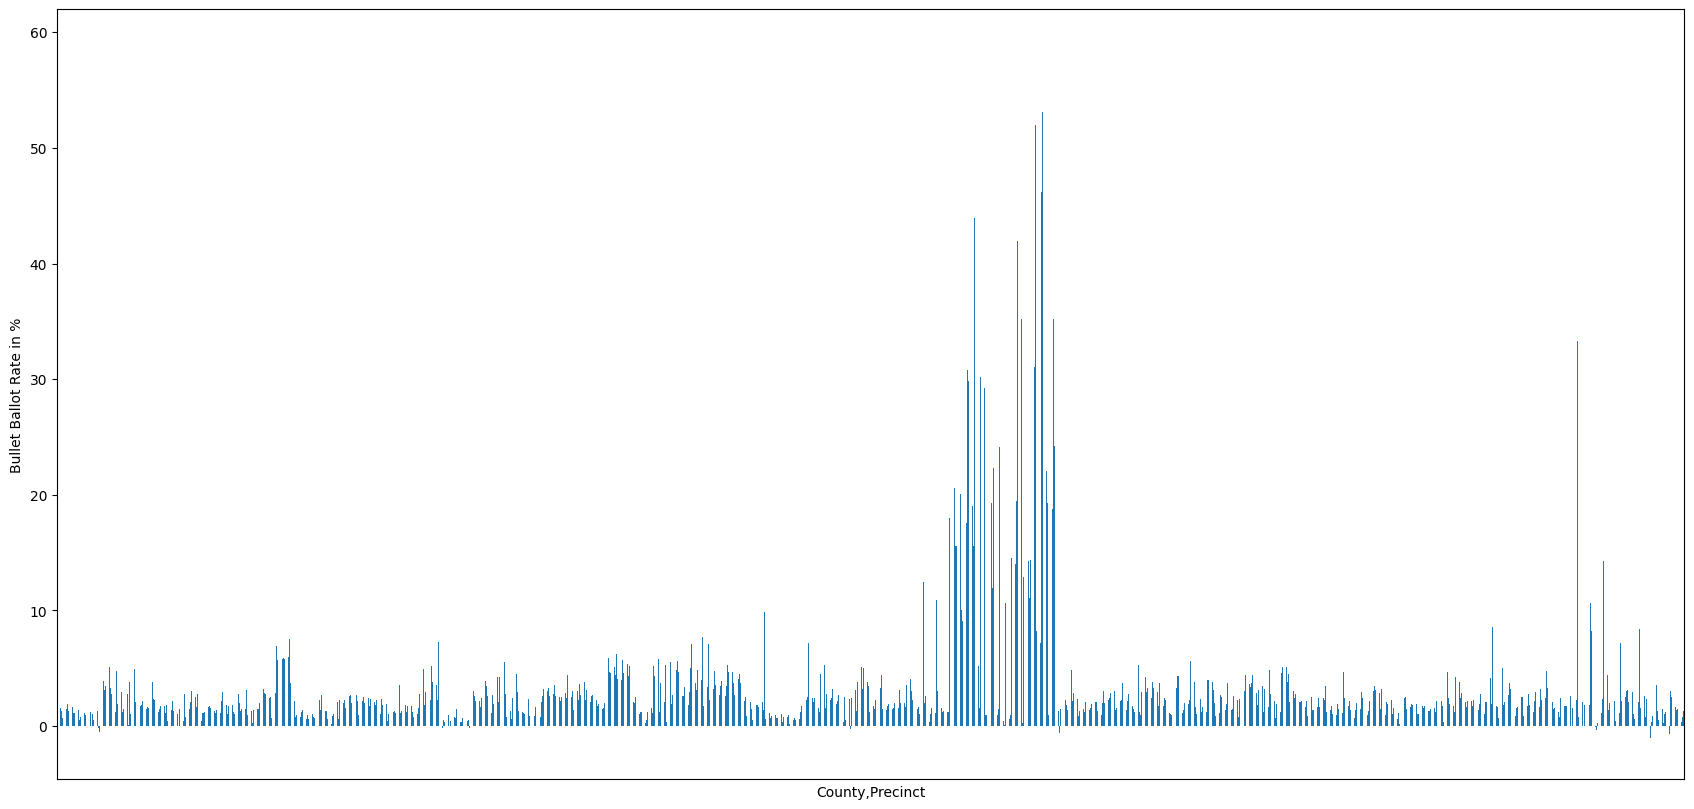

In [64]:
total["Bullet Ballots %"].plot.bar(figsize=(21, 10), xticks=[], ylabel="Bullet Ballot Rate in %")

# Compare mean and median rate of bullet ballots

In [65]:
total.mean()["Bullet Ballots %"]

np.float64(3.17371949026525)

In [66]:
total.median()["Bullet Ballots %"]

np.float64(1.941747572815534)

# Plot sorted bullet ballot rates

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

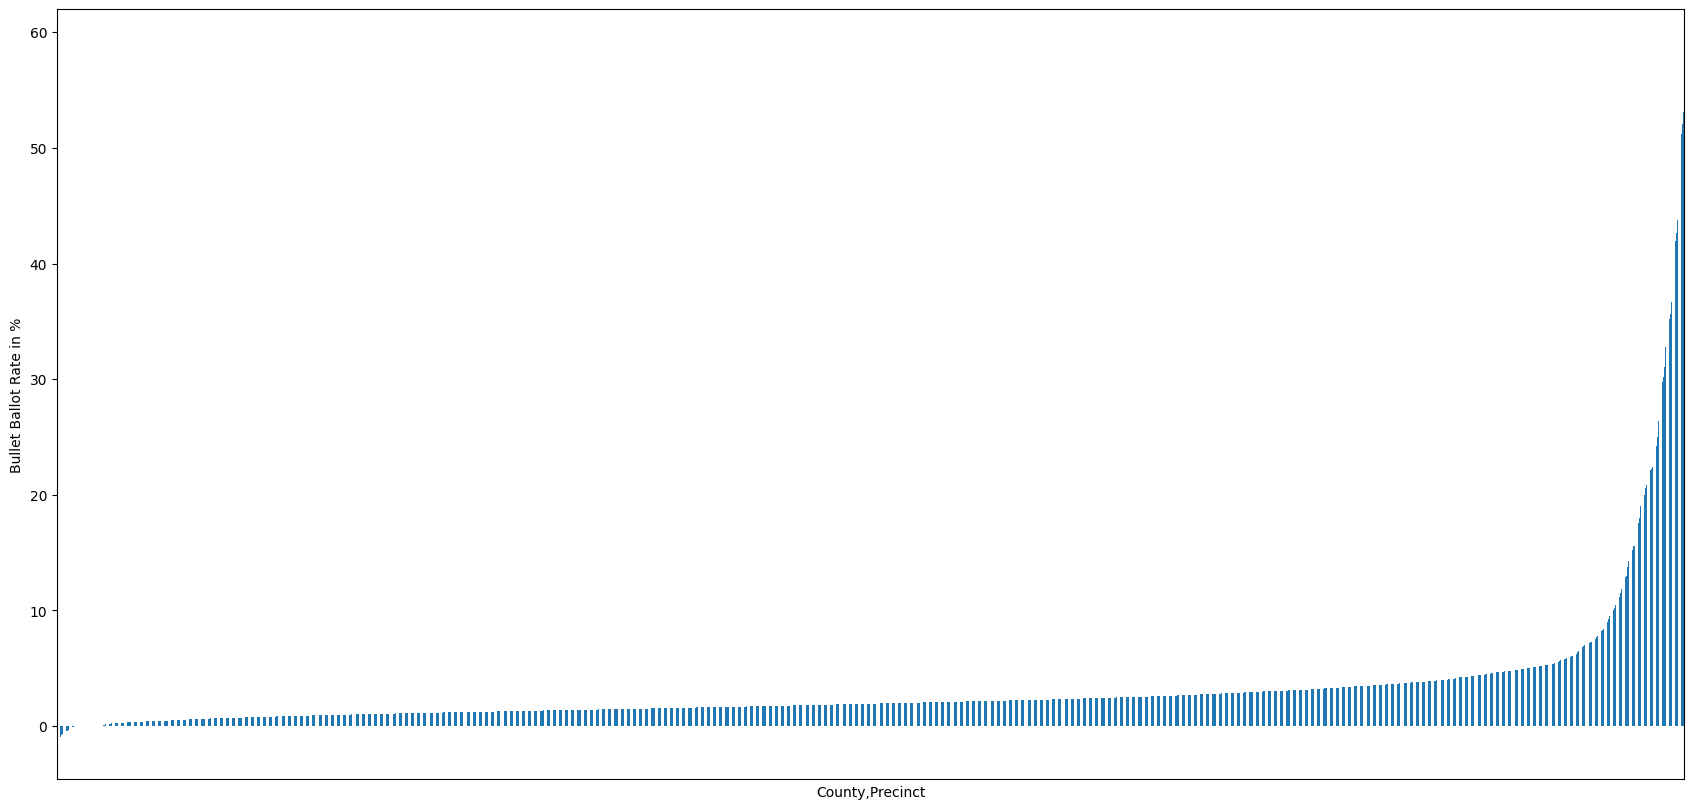

In [67]:
total.sort_values("Bullet Ballots %")["Bullet Ballots %"].plot.bar(figsize=(21,10), xticks=[], ylabel="Bullet Ballot Rate in %")

# Zoom into the 50 highest bullet ballot rates

<Axes: xlabel='County,Precinct', ylabel='Bullet Ballot Rate in %'>

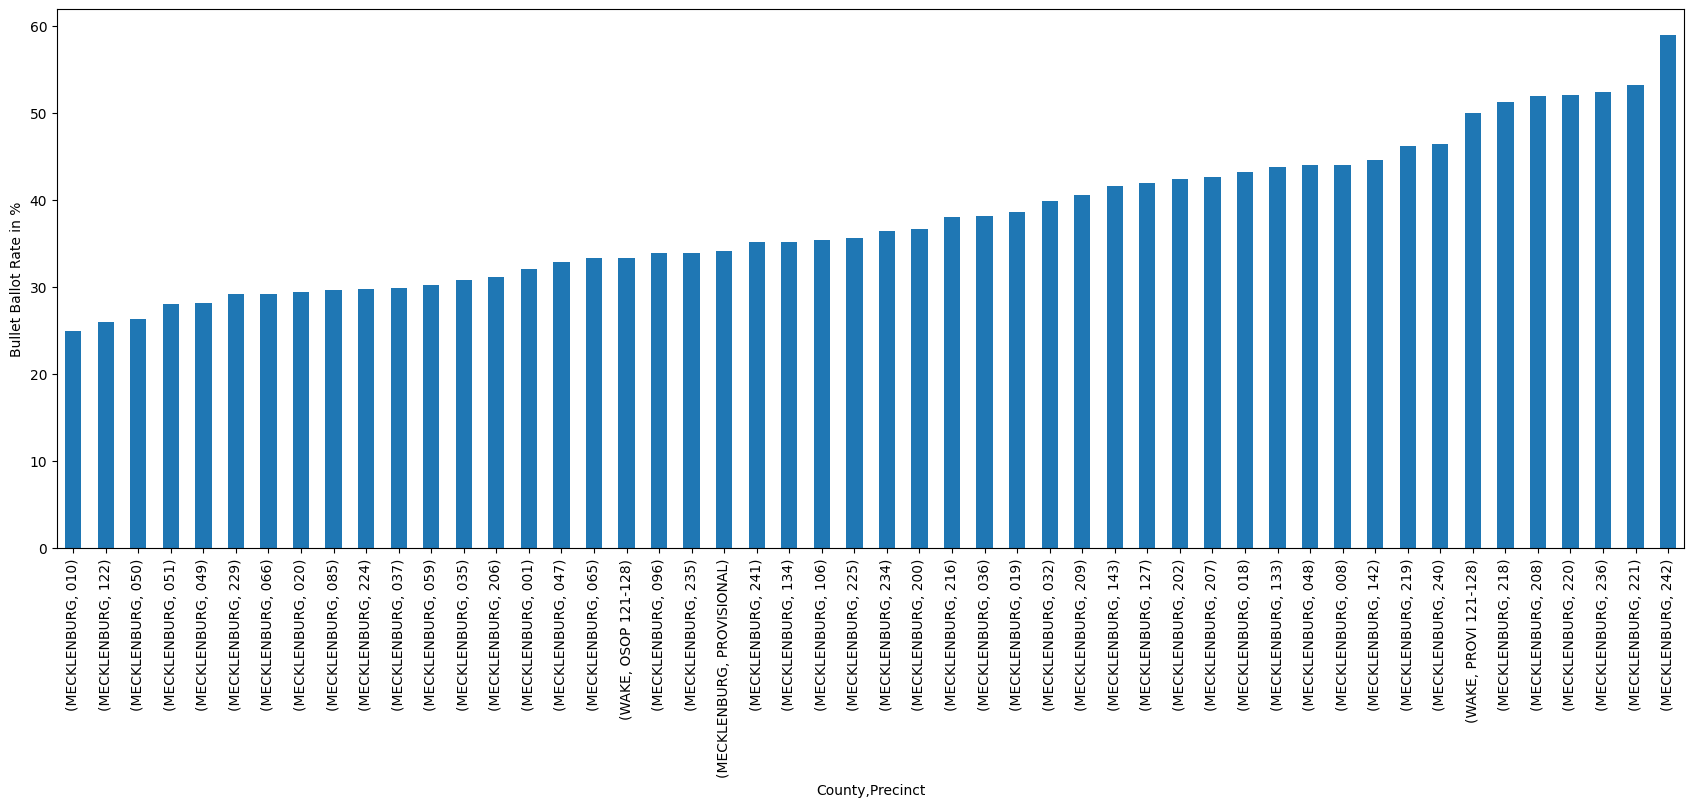

In [68]:
total.sort_values("Bullet Ballots %")["Bullet Ballots %"].iloc[-50:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %")

25 - 52 % bullet ballots seems quite high compared to the median of 2.3 % and mean of 4.1 %.

# Check precincts with highest bullet ballot rates

In [69]:
total.loc["PITT", "1501"]

Absentee by Mail House         0.0
Total Votes House             82.0
Absentee by Mail President     0.0
Total Votes President         82.0
Difference                     0.0
Bullet Ballots %               0.0
Name: (PITT, 1501), dtype: float64

In [70]:
total.loc["SAMPSON", "CLCE"]

Absentee by Mail House         67.000000
Total Votes House             643.000000
Absentee by Mail President     69.000000
Total Votes President         664.000000
Difference                     21.000000
Bullet Ballots %                3.162651
Name: (SAMPSON, CLCE), dtype: float64

In [71]:
total.loc["ONSLOW", "NR02"]

Absentee by Mail House         209.000000
Total Votes House             1048.000000
Absentee by Mail President     212.000000
Total Votes President         1086.000000
Difference                      38.000000
Bullet Ballots %                 3.499079
Name: (ONSLOW, NR02), dtype: float64

# Check overall statistics 
e.g. median and mean number of votes per precinct

In [72]:
total.median()

Absentee by Mail House          0.000000
Total Votes House             841.000000
Absentee by Mail President      0.000000
Total Votes President         876.000000
Difference                     14.000000
Bullet Ballots %                1.941748
dtype: float64

In [73]:
total.describe()

,Absentee by Mail House,Total Votes House,Absentee by Mail President,Total Votes President,Difference,Bullet Ballots %
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000
mean,319.228352,1780.422935,332.709462,1847.142093,66.719157,3.173719
std,3519.029035,5318.246844,3819.038992,5599.123086,456.606393,5.476455
min,0.000000,1.000000,0.000000,1.000000,-4.000000,-1.587302
25%,0.000000,324.500000,0.000000,332.000000,6.000000,1.204043
50%,0.000000,841.000000,0.000000,876.000000,14.000000,1.941748
75%,189.000000,1872.500000,192.000000,1953.000000,40.000000,3.039514
max,128126.000000,185364.000000,134743.000000,190892.000000,22542.000000,58.946878


# Check detailed votes in high bullet ballot precincts

In [74]:
df_precinct = df.set_index(["County", "Precinct"])
df_precinct

,,Election Date,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15
County,Precinct,,,,,,,,,,,,,,
TYRRELL,3,11/03/2020,1359,S,NC TREASURER,Ronnie Chatterji,DEM,1,16,0,0,0,16,Y,NaN
WAYNE,06,11/03/2020,1011,S,NC COURT OF APPEALS JUDGE SEAT 05,Fred Gore,REP,1,95,0,0,0,95,Y,NaN
FORSYTH,081,11/03/2020,1342,S,NC SUPERINTENDENT OF PUBLIC INSTRUCTION,Jen Mangrum,DEM,1,204,1076,367,7,1654,Y,NaN
NEW HANOVER,W03,11/03/2020,1373,S,US PRESIDENT,Donald J. Trump,REP,1,71,0,31,1,103,Y,NaN
MECKLENBURG,241,11/03/2020,1008,S,NC COMMISSIONER OF INSURANCE,Mike Causey,REP,1,348,2257,0,0,2605,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DURHAM,OS MSUMC,11/03/2020,1085,S,NC DISTRICT COURT JUDGE DISTRICT 14 SEAT 07,Shamieka LaCher Rhinehart,DEM,1,0,5583,0,0,5583,N,NaN
WAKE,OSKD 121-128,11/03/2020,7,C,WAKE COUNTY BOARD OF COMMISSIONERS DISTRICT 07,Faruk Okcetin,REP,1,0,0,0,0,0,N,NaN
EDGECOMBE,1202,11/03/2020,1373,S,US PRESIDENT,Jade Simmons (Write-In),NaN,1,0,0,0,0,0,Y,NaN


## PITT 1501

In [75]:
df_pitt_1501 = df_precinct.loc["PITT", "1501"]
df_pitt_1501

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_71755/1704475038.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_pitt_1501 = df_precinct.loc["PITT", "1501"]


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
PITT   1501        11/03/2020              1374            S   
       1501        11/03/2020                10            C   
       1501        11/03/2020              1386            S   
       1501        11/03/2020              1009            S   
       1501        11/03/2020              1291            S   
...                       ...               ...          ...   
       1501        11/03/2020                10            C   
       1501        11/03/2020              1169            S   
       1501        11/03/2020              1008            S   
       1501        11/03/2020                10            C   
       1501        11/03/2020              1374            S   

                                                      Contest Name  \
County Precinct                                                      
PITT   1501                                              US SENATE   
       1501      PITT SOIL AND WATER CONSERVATION DISTRICT SUPE...   
       1501             NC SUPREME COURT ASSOCIATE JUSTICE SEAT 04   
       1501                               NC COMMISSIONER OF LABOR   
       1501                                  NC SECRETARY OF STATE   
...                                                            ...   
       1501      PITT SOIL AND WATER CONSERVATION DISTRICT SUPE...   
       1501                                            NC GOVERNOR   
       1501                           NC COMMISSIONER OF INSURANCE   
       1501      PITT SOIL AND WATER CONSERVATION DISTRICT SUPE...   
       1501                                              US SENATE   

                                   Choice Choice Party  Vote For  \
County Precinct                                                    
PITT   1501                Cal Cunningham          DEM         1   
       1501                   Brooks Bunn                      1   
       1501                    Mark Davis          DEM         1   
       1501                Jessica Holmes          DEM         1   
       1501               Elaine Marshall          DEM         1   
...                                   ...          ...       ...   
       1501      Write-In (Miscellaneous)          NaN         1   
       1501             Steven J. DiFiore          LIB         1   
       1501                 Wayne Goodwin          DEM         1   
       1501         Sam Uzzell (Write-In)          NaN         1   
       1501                   Thom Tillis          REP         1   

                 Election Day  One Stop  Absentee by Mail  Provisional  \
County Precinct                                                          
PITT   1501                78         0                 0            0   
       1501                20         0                 0            0   
       1501                76         0                 0            0   
       1501                79         0                 0            0   
       1501                78         0                 0            0   
...                       ...       ...               ...          ...   
       1501                 0         0                 0            0   
       1501                 0         0                 0            0   
       1501                74         0                 0            0   
       1501                 0         0                 0            0   
       1501                 2         0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
PITT   1501               78             Y          NaN  
       1501               20             Y          NaN  
       1501               76             Y          NaN  
       1501               79             Y          NaN  
       1501               78             Y          NaN  
...               

In [76]:
filter_for(df_pitt_1501, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
PITT   1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   
       1501        11/03/2020              1373            S  US PRESIDENT   

                                   Choice Choice Party  Vote For  \
County Precinct                                                    
PITT   1501               Joseph R. Biden          DEM         1   
       1501               Donald J. Trump          REP         1   
       1501               Don Blankenship          CST         1   
       1501                 Howie Hawkins          GRE         1   
       1501      Write-In (Miscellaneous)          NaN         1   
       1501       Jade Simmons (Write-In)          NaN         1   
       1501                  Jo Jorgensen          LIB         1   

                 Election Day  One Stop  Absentee by Mail  Provisional  \
County Precinct                                                          
PITT   1501                76         0                 0            0   
       1501                 3         0                 0            0   
       1501                 2         0                 0            0   
       1501                 1         0                 0            0   
       1501                 0         0                 0            0   
       1501                 0         0                 0            0   
       1501                 0         0                 0            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
PITT   1501               76             Y          NaN  
       1501                3             Y          NaN  
       1501                2             Y          NaN  
       1501                1             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN  
       1501                0             Y          NaN

In [77]:
contains(df_pitt_1501, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County Precinct                                                
PITT   1501        11/03/2020              1403            S   
       1501        11/03/2020              1403            S   

                                            Contest Name             Choice  \
County Precinct                                                               
PITT   1501      US HOUSE OF REPRESENTATIVES DISTRICT 01  G. K. Butterfield   
       1501      US HOUSE OF REPRESENTATIVES DISTRICT 01        Sandy Smith   

                Choice Party  Vote For  Election Day  One Stop  \
County Precinct                                                  
PITT   1501              DEM         1            77         0   
       1501              REP         1             5         0   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
PITT   1501                     0            0           77             Y   
       1501                     0            0            5             Y   

                 Unnamed: 15  
County Precinct               
PITT   1501              NaN  
       1501              NaN

## SAMPSON CLCE

In [78]:
df_samp_clce = df_precinct.loc["SAMPSON", "CLCE"]
df_samp_clce

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_71755/3321473869.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_samp_clce = df_precinct.loc["SAMPSON", "CLCE"]


Election Date  Contest Group ID Contest Type  \
County  Precinct                                                
SAMPSON CLCE        11/03/2020              1191            S   
        CLCE        11/03/2020              1386            S   
        CLCE        11/03/2020              1373            S   
        CLCE        11/03/2020              1008            S   
        CLCE        11/03/2020              1005            S   
...                        ...               ...          ...   
        CLCE        11/03/2020              1290            S   
        CLCE        11/03/2020              1029            S   
        CLCE        11/03/2020              1374            S   
        CLCE        11/03/2020              1009            S   
        CLCE        11/03/2020              1342            S   

                                                 Contest Name  \
County  Precinct                                                
SAMPSON CLCE         NC HOUSE OF REPRESENTATIVES DISTRICT 022   
        CLCE       NC SUPREME COURT ASSOCIATE JUSTICE SEAT 04   
        CLCE                                     US PRESIDENT   
        CLCE                     NC COMMISSIONER OF INSURANCE   
        CLCE                              NC ATTORNEY GENERAL   
...                                                       ...   
        CLCE                           NC LIEUTENANT GOVERNOR   
        CLCE      NC DISTRICT COURT JUDGE DISTRICT 04 SEAT 06   
        CLCE                                        US SENATE   
        CLCE                         NC COMMISSIONER OF LABOR   
        CLCE          NC SUPERINTENDENT OF PUBLIC INSTRUCTION   

                                     Choice Choice Party  Vote For  \
County  Precinct                                                     
SAMPSON CLCE                William Brisson          REP         1   
        CLCE               Tamara Barringer          REP         1   
        CLCE        Jade Simmons (Write-In)          NaN         1   
        CLCE                  Wayne Goodwin          DEM         1   
        CLCE                    Jim O'Neill          REP         1   
...                                     ...          ...       ...   
        CLCE                  Mark Robinson          REP         1   
        CLCE      James L. (Jim) Moore, Jr.          REP         1   
        CLCE                 Cal Cunningham          DEM         1   
        CLCE                 Jessica Holmes          DEM         1   
        CLCE                    Jen Mangrum          DEM         1   

                  Election Day  One Stop  Absentee by Mail  Provisional  \
County  Precinct                                                          
SAMPSON CLCE                18        61                 6            0   
        CLCE                18        68                10            0   
        CLCE                 0         0                 0            0   
        CLCE                69       419                59            1   
        CLCE                21        66                 7            0   
...                        ...       ...               ...          ...   
        CLCE                20        72                 6            0   
        CLCE                45       131                18            0   
        CLCE                66       414                60            1   
        CLCE                71       421                62            1   
        CLCE                70       418                60            1   

                  Total Votes Real Precinct  Unnamed: 15  
County  Precinct                                          
SAMPSON CLCE               85             Y          NaN  
        CLCE               96             Y          NaN  
        CLCE                0             Y          NaN  
        CLCE              548             Y          NaN  
        CLCE               94             Y          NaN  
...                      

In [79]:
filter_for(df_samp_clce, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County  Precinct                                                              
SAMPSON CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   
        CLCE        11/03/2020              1373            S  US PRESIDENT   

                                    Choice Choice Party  Vote For  \
County  Precinct                                                    
SAMPSON CLCE               Joseph R. Biden          DEM         1   
        CLCE               Donald J. Trump          REP         1   
        CLCE                  Jo Jorgensen          LIB         1   
        CLCE                 Howie Hawkins          GRE         1   
        CLCE               Don Blankenship          CST         1   
        CLCE      Write-In (Miscellaneous)          NaN         1   
        CLCE       Jade Simmons (Write-In)          NaN         1   

                  Election Day  One Stop  Absentee by Mail  Provisional  \
County  Precinct                                                          
SAMPSON CLCE                72       431                63            1   
        CLCE                19        69                 4            0   
        CLCE                 1         0                 1            0   
        CLCE                 0         1                 0            0   
        CLCE                 1         0                 0            0   
        CLCE                 0         0                 1            0   
        CLCE                 0         0                 0            0   

                  Total Votes Real Precinct  Unnamed: 15  
County  Precinct                                          
SAMPSON CLCE              567             Y          NaN  
        CLCE               92             Y          NaN  
        CLCE                2             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                1             Y          NaN  
        CLCE                0             Y          NaN

In [80]:
contains(df_samp_clce, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County  Precinct                                                
SAMPSON CLCE        11/03/2020              1409            S   
        CLCE        11/03/2020              1409            S   
        CLCE        11/03/2020              1409            S   
        CLCE        11/03/2020              1409            S   

                                             Contest Name  \
County  Precinct                                            
SAMPSON CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 07   
        CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 07   
        CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 07   
        CLCE      US HOUSE OF REPRESENTATIVES DISTRICT 07   

                                              Choice Choice Party  Vote For  \
County  Precinct                                                              
SAMPSON CLCE                            David Rouzer          REP         1   
        CLCE      Theresa (Terri) Everett (Write-In)          NaN         1   
        CLCE                Write-In (Miscellaneous)          NaN         1   
        CLCE                     Christopher M. Ward          DEM         1   

                  Election Day  One Stop  Absentee by Mail  Provisional  \
County  Precinct                                                          
SAMPSON CLCE                21        72                 7            0   
        CLCE                 0         0                 0            0   
        CLCE                 0         0                 0            0   
        CLCE                68       414                60            1   

                  Total Votes Real Precinct  Unnamed: 15  
County  Precinct                                          
SAMPSON CLCE              100             Y          NaN  
        CLCE                0             Y          NaN  
        CLCE                0             Y          NaN  
        CLCE              543             Y          NaN

# ONSLOW NR02

In [81]:
df_on_nr02 = df_precinct.loc["ONSLOW", "NR02"]
df_on_nr02

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_71755/3778285947.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_on_nr02 = df_precinct.loc["ONSLOW", "NR02"]


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW NR02        11/03/2020              1377            S   
       NR02        11/03/2020              1342            S   
       NR02        11/03/2020                 4            C   
       NR02        11/03/2020              1374            S   
       NR02        11/03/2020              1031            S   
...                       ...               ...          ...   
       NR02        11/03/2020              1384            S   
       NR02        11/03/2020              1169            S   
       NR02        11/03/2020              1375            S   
       NR02        11/03/2020              1029            S   
       NR02        11/03/2020                 1            C   

                                                      Contest Name  \
County Precinct                                                      
ONSLOW NR02            NC DISTRICT COURT JUDGE DISTRICT 04 SEAT 09   
       NR02                NC SUPERINTENDENT OF PUBLIC INSTRUCTION   
       NR02      ONSLOW SOIL AND WATER CONSERVATION DISTRICT SU...   
       NR02                                              US SENATE   
       NR02            NC DISTRICT COURT JUDGE DISTRICT 04 SEAT 08   
...                                                            ...   
       NR02                      NC COURT OF APPEALS JUDGE SEAT 07   
       NR02                                            NC GOVERNOR   
       NR02                 NC SUPREME COURT CHIEF JUSTICE SEAT 01   
       NR02            NC DISTRICT COURT JUDGE DISTRICT 04 SEAT 06   
       NR02                   ONSLOW COUNTY BOARD OF COMMISSIONERS   

                                    Choice Choice Party  Vote For  \
County Precinct                                                     
ONSLOW NR02       James Walter Bateman III          REP         1   
       NR02                    Jen Mangrum          DEM         1   
       NR02                 S. Jerome Shaw                      1   
       NR02                 Kevin E. Hayes          CST         1   
       NR02                   Billy Sutton          REP         1   
...                                    ...          ...       ...   
       NR02                 Jeff Carpenter          REP         1   
       NR02                     Dan Forest          REP         1   
       NR02                     Paul Newby          REP         1   
       NR02      James L. (Jim) Moore, Jr.          REP         1   
       NR02                Walter J. Scott          REP         5   

                 Election Day  One Stop  Absentee by Mail  Provisional  \
County Precinct                                                          
ONSLOW NR02                99       163                76            7   
       NR02               126       509               164           13   
       NR02               111       264               117           10   
       NR02                 6         9                 5            1   
       NR02                99       168                76            9   
...                       ...       ...               ...          ...   
       NR02                76       102                42           10   
       NR02                67        78                34            8   
       NR02                71        88                35            8   
       NR02                98       170                79           10   
       NR02                70       104                45           11   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
ONSLOW NR02              345             Y          NaN  
       NR02              812             Y          NaN  
       NR02              502             Y          NaN  
       NR02               21             Y          NaN  
       NR02              352             Y          NaN  
...  

In [82]:
filter_for(df_on_nr02, "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
ONSLOW NR02        11/03/2020              1373            S  US PRESIDENT   
       NR02        11/03/2020              1373            S  US PRESIDENT   
       NR02        11/03/2020              1373            S  US PRESIDENT   
       NR02        11/03/2020              1373            S  US PRESIDENT   
       NR02        11/03/2020              1373            S  US PRESIDENT   
       NR02        11/03/2020              1373            S  US PRESIDENT   

                                   Choice Choice Party  Vote For  \
County Precinct                                                    
ONSLOW NR02               Joseph R. Biden          DEM         1   
       NR02               Donald J. Trump          REP         1   
       NR02                  Jo Jorgensen          LIB         1   
       NR02      Write-In (Miscellaneous)          NaN         1   
       NR02               Don Blankenship          CST         1   
       NR02                 Howie Hawkins          GRE         1   

                 Election Day  One Stop  Absentee by Mail  Provisional  \
County Precinct                                                          
ONSLOW NR02               128       521               166           15   
       NR02                78        95                38           12   
       NR02                 6        12                 7            1   
       NR02                 1         2                 0            0   
       NR02                 0         2                 0            1   
       NR02                 0         0                 1            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
ONSLOW NR02              830             Y          NaN  
       NR02              223             Y          NaN  
       NR02               26             Y          NaN  
       NR02                3             Y          NaN  
       NR02                3             Y          NaN  
       NR02                1             Y          NaN

In [83]:
contains(df_on_nr02, "Contest Name", "US HOUSE OF REPRESENTATIVES")

Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW NR02        11/03/2020              1405            S   
       NR02        11/03/2020              1405            S   

                                            Contest Name        Choice  \
County Precinct                                                          
ONSLOW NR02      US HOUSE OF REPRESENTATIVES DISTRICT 03  Daryl Farrow   
       NR02      US HOUSE OF REPRESENTATIVES DISTRICT 03   Greg Murphy   

                Choice Party  Vote For  Election Day  One Stop  \
County Precinct                                                  
ONSLOW NR02              DEM         1           126       509   
       NR02              REP         1            76       100   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
ONSLOW NR02                   166           16          817             Y   
       NR02                    43           12          231             Y   

                 Unnamed: 15  
County Precinct               
ONSLOW NR02              NaN  
       NR02              NaN

In [84]:
total.loc["ONSLOW", "CL10"]

Absentee by Mail House         214.000000
Total Votes House             2085.000000
Absentee by Mail President     225.000000
Total Votes President         2164.000000
Difference                      79.000000
Bullet Ballots %                 3.650647
Name: (ONSLOW, CL10), dtype: float64

In [85]:
filter_for(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_71755/1582814672.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  filter_for(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US PRESIDENT").sort_values("Total Votes", ascending=False)


Election Date  Contest Group ID Contest Type  Contest Name  \
County Precinct                                                              
ONSLOW CL10        11/03/2020              1373            S  US PRESIDENT   
       CL10        11/03/2020              1373            S  US PRESIDENT   
       CL10        11/03/2020              1373            S  US PRESIDENT   
       CL10        11/03/2020              1373            S  US PRESIDENT   
       CL10        11/03/2020              1373            S  US PRESIDENT   
       CL10        11/03/2020              1373            S  US PRESIDENT   

                                   Choice Choice Party  Vote For  \
County Precinct                                                    
ONSLOW CL10               Donald J. Trump          REP         1   
       CL10               Joseph R. Biden          DEM         1   
       CL10                  Jo Jorgensen          LIB         1   
       CL10                 Howie Hawkins          GRE         1   
       CL10      Write-In (Miscellaneous)          NaN         1   
       CL10               Don Blankenship          CST         1   

                 Election Day  One Stop  Absentee by Mail  Provisional  \
County Precinct                                                          
ONSLOW CL10               450      1057               117           15   
       CL10                72       281                99            5   
       CL10                21        31                 7            3   
       CL10                 1         2                 1            0   
       CL10                 1         0                 0            0   
       CL10                 0         0                 1            0   

                 Total Votes Real Precinct  Unnamed: 15  
County Precinct                                          
ONSLOW CL10             1639             Y          NaN  
       CL10              457             Y          NaN  
       CL10               62             Y          NaN  
       CL10                4             Y          NaN  
       CL10                1             Y          NaN  
       CL10                1             Y          NaN

In [86]:
contains(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US HOUSE").sort_values("Total Votes", ascending=False)

/var/folders/1g/f2_4cgh50917572x__gt14h80000gn/T/ipykernel_71755/3452455610.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  contains(df_precinct.loc["ONSLOW", "CL10"], "Contest Name", "US HOUSE").sort_values("Total Votes", ascending=False)


Election Date  Contest Group ID Contest Type  \
County Precinct                                                
ONSLOW CL10        11/03/2020              1405            S   
       CL10        11/03/2020              1405            S   

                                            Contest Name        Choice  \
County Precinct                                                          
ONSLOW CL10      US HOUSE OF REPRESENTATIVES DISTRICT 03   Greg Murphy   
       CL10      US HOUSE OF REPRESENTATIVES DISTRICT 03  Daryl Farrow   

                Choice Party  Vote For  Election Day  One Stop  \
County Precinct                                                  
ONSLOW CL10              REP         1           456      1049   
       CL10              DEM         1            65       279   

                 Absentee by Mail  Provisional  Total Votes Real Precinct  \
County Precinct                                                             
ONSLOW CL10                   119           19         1643             Y   
       CL10                    95            3          442             Y   

                 Unnamed: 15  
County Precinct               
ONSLOW CL10              NaN  
       CL10              NaN

# Determine winner and margin

In [87]:
df_winner = df_precinct.reset_index().set_index(["County", "Precinct", "Contest Name", "Choice"])
idx = df_winner.groupby(level=(0, 1, 2))["Total Votes"].idxmax()
idx

County    Precinct  Contest Name                                            
ALAMANCE  01        ALAMANCE COUNTY BOARD OF COMMISSIONERS                      (ALAMANCE, 01, ALAMANCE COUNTY BOARD OF COMMIS...
                    ALAMANCE COUNTY REGISTER OF DEEDS                           (ALAMANCE, 01, ALAMANCE COUNTY REGISTER OF DEE...
                    ALAMANCE SOIL AND WATER CONSERVATION DISTRICT SUPERVISOR    (ALAMANCE, 01, ALAMANCE SOIL AND WATER CONSERV...
                    ALAMANCE-BURLINGTON BOARD OF EDUCATION                      (ALAMANCE, 01, ALAMANCE-BURLINGTON BOARD OF ED...
                    NC ATTORNEY GENERAL                                          (ALAMANCE, 01, NC ATTORNEY GENERAL, Jim O'Neill)
                                                                                                      ...                        
YANCEY    11 PRI    US SENATE                                                            (YANCEY, 11 PRI, US SENATE, Thom Tillis)
             

In [88]:
df_winner = df_winner.loc[idx].loc[:,:,"US PRESIDENT"]
df_winner

Election Date  Contest Group ID  \
County   Precinct Choice                                            
ALAMANCE 01       Donald J. Trump    11/03/2020              1373   
         02       Donald J. Trump    11/03/2020              1373   
         035      Donald J. Trump    11/03/2020              1373   
         03C      Donald J. Trump    11/03/2020              1373   
         03N      Joseph R. Biden    11/03/2020              1373   
...                                         ...               ...   
YANCEY   07 BRU   Donald J. Trump    11/03/2020              1373   
         08 CRA   Donald J. Trump    11/03/2020              1373   
         09 SOU   Donald J. Trump    11/03/2020              1373   
         10 PEN   Donald J. Trump    11/03/2020              1373   
         11 PRI   Donald J. Trump    11/03/2020              1373   

                                  Contest Type Choice Party  Vote For  \
County   Precinct Choice                                                
ALAMANCE 01       Donald J. Trump            S          REP         1   
         02       Donald J. Trump            S          REP         1   
         035      Donald J. Trump            S          REP         1   
         03C      Donald J. Trump            S          REP         1   
         03N      Joseph R. Biden            S          DEM         1   
...                                        ...          ...       ...   
YANCEY   07 BRU   Donald J. Trump            S          REP         1   
         08 CRA   Donald J. Trump            S          REP         1   
         09 SOU   Donald J. Trump            S          REP         1   
         10 PEN   Donald J. Trump            S          REP         1   
         11 PRI   Donald J. Trump            S          REP         1   

                                   Election Day  One Stop  Absentee by Mail  \
County   Precinct Choice                                                      
ALAMANCE 01       Donald J. Trump           793      1271               226   
         02       Donald J. Trump           670      1504               210   
         035      Donald J. Trump           401      1164               210   
         03C      Donald J. Trump           209       764               166   
         03N      Joseph R. Biden           149       733               418   
...                                         ...       ...               ...   
YANCEY   07 BRU   Donald J. Trump            76       128                20   
         08 CRA   Donald J. Trump           302      1013                92   
         09 SOU   Donald J. Trump           251       538                74   
         10 PEN   Donald J. Trump           149       153                25   
         11 PRI   Donald J. Trump           147       528                67   

                                   Provisional  Total Votes Real Precinct  \
County   Precinct Choice                                                    
ALAMANCE 01       Donald J. Trump            9         2299             Y   
         02       Donald J. Trump            3         2387             Y   
         035      Donald J. Trump            0         1775             Y   
         03C      Donald J. Trump            4         1143             Y   
         03N      Joseph R. Biden            1         1301             Y   
...                                        ...          ...           ...   
YANCEY   07 BRU   Donald J. Trump            0          224             Y   
         08 CRA   Donald J. Trump            4         1411             Y   
         09 SOU   Donald J. Trump            2          865             Y   
         10 PEN   Donald J. Trump            1          328             Y   
         11 PRI   Donald J. Trump            4          746             Y   

                                   Unnamed: 15  
County   Precinct Choice                        
ALAMANCE 01       Donald J. Trump          NaN  
         

In [89]:
df_winner["Color"] = ["r" if choice == "REP" else "b" for choice in df_winner["Choice Party"]]
df_winner

Election Date  Contest Group ID  \
County   Precinct Choice                                            
ALAMANCE 01       Donald J. Trump    11/03/2020              1373   
         02       Donald J. Trump    11/03/2020              1373   
         035      Donald J. Trump    11/03/2020              1373   
         03C      Donald J. Trump    11/03/2020              1373   
         03N      Joseph R. Biden    11/03/2020              1373   
...                                         ...               ...   
YANCEY   07 BRU   Donald J. Trump    11/03/2020              1373   
         08 CRA   Donald J. Trump    11/03/2020              1373   
         09 SOU   Donald J. Trump    11/03/2020              1373   
         10 PEN   Donald J. Trump    11/03/2020              1373   
         11 PRI   Donald J. Trump    11/03/2020              1373   

                                  Contest Type Choice Party  Vote For  \
County   Precinct Choice                                                
ALAMANCE 01       Donald J. Trump            S          REP         1   
         02       Donald J. Trump            S          REP         1   
         035      Donald J. Trump            S          REP         1   
         03C      Donald J. Trump            S          REP         1   
         03N      Joseph R. Biden            S          DEM         1   
...                                        ...          ...       ...   
YANCEY   07 BRU   Donald J. Trump            S          REP         1   
         08 CRA   Donald J. Trump            S          REP         1   
         09 SOU   Donald J. Trump            S          REP         1   
         10 PEN   Donald J. Trump            S          REP         1   
         11 PRI   Donald J. Trump            S          REP         1   

                                   Election Day  One Stop  Absentee by Mail  \
County   Precinct Choice                                                      
ALAMANCE 01       Donald J. Trump           793      1271               226   
         02       Donald J. Trump           670      1504               210   
         035      Donald J. Trump           401      1164               210   
         03C      Donald J. Trump           209       764               166   
         03N      Joseph R. Biden           149       733               418   
...                                         ...       ...               ...   
YANCEY   07 BRU   Donald J. Trump            76       128                20   
         08 CRA   Donald J. Trump           302      1013                92   
         09 SOU   Donald J. Trump           251       538                74   
         10 PEN   Donald J. Trump           149       153                25   
         11 PRI   Donald J. Trump           147       528                67   

                                   Provisional  Total Votes Real Precinct  \
County   Precinct Choice                                                    
ALAMANCE 01       Donald J. Trump            9         2299             Y   
         02       Donald J. Trump            3         2387             Y   
         035      Donald J. Trump            0         1775             Y   
         03C      Donald J. Trump            4         1143             Y   
         03N      Joseph R. Biden            1         1301             Y   
...                                        ...          ...           ...   
YANCEY   07 BRU   Donald J. Trump            0          224             Y   
         08 CRA   Donald J. Trump            4         1411             Y   
         09 SOU   Donald J. Trump            2          865             Y   
         10 PEN   Donald J. Trump            1          328             Y   
         11 PRI   Donald J. Trump            4          746             Y   

                                   Unnamed: 15 Color  
County   Precinct Choice                              
ALAMANCE 01       Donald J. Trump          NaN

In [90]:
colored_total = pd.merge(total, df_winner[["Choice Party", "Absentee by Mail", "Total Votes", "Color"]], left_index=True, right_index=True)
colored_total

Absentee by Mail House  Total Votes House  \
County   Precinct Choice                                                       
ALAMANCE 01       Donald J. Trump                     411               2878   
         02       Donald J. Trump                     394               2935   
         035      Donald J. Trump                     592               3283   
         03C      Donald J. Trump                     425               2016   
         03N      Joseph R. Biden                     578               2477   
...                                                   ...                ...   
YANCEY   07 BRU   Donald J. Trump                      43                322   
         08 CRA   Donald J. Trump                     250               1984   
         09 SOU   Donald J. Trump                     284               1537   
         10 PEN   Donald J. Trump                      55                445   
         11 PRI   Donald J. Trump                     115                982   

                                   Absentee by Mail President  \
County   Precinct Choice                                        
ALAMANCE 01       Donald J. Trump                         414   
         02       Donald J. Trump                         403   
         035      Donald J. Trump                         603   
         03C      Donald J. Trump                         431   
         03N      Joseph R. Biden                         593   
...                                                       ...   
YANCEY   07 BRU   Donald J. Trump                          42   
         08 CRA   Donald J. Trump                         253   
         09 SOU   Donald J. Trump                         288   
         10 PEN   Donald J. Trump                          55   
         11 PRI   Donald J. Trump                         112   

                                   Total Votes President  Difference  \
County   Precinct Choice                                               
ALAMANCE 01       Donald J. Trump                   2907          29   
         02       Donald J. Trump                   2972          37   
         035      Donald J. Trump                   3328          45   
         03C      Donald J. Trump                   2034          18   
         03N      Joseph R. Biden                   2525          48   
...                                                  ...         ...   
YANCEY   07 BRU   Donald J. Trump                    325           3   
         08 CRA   Donald J. Trump                   2000          16   
         09 SOU   Donald J. Trump                   1555          18   
         10 PEN   Donald J. Trump                    451           6   
         11 PRI   Donald J. Trump                    982           0   

                                   Bullet Ballots % Choice Party  \
County   Precinct Choice                                           
ALAMANCE 01       Donald J. Trump          0.997592          REP   
         02       Donald J. Trump          1.244953          REP   
         035      Donald J. Trump          1.352163          REP   
         03C      Donald J. Trump          0.884956          REP   
         03N      Joseph R. Biden          1.900990          DEM   
...                                             ...          ...   
YANCEY   07 BRU   Donald J. Trump          0.923077          REP   
         08 CRA   Donald J. Trump          0.800000          REP   
         09 SOU   Donald J. Trump          1.157556          REP   
         10 PEN   Donald J. Trump          1.330377          REP   
         11 PRI   Donald J. Trump          0.000000          REP   

                                   Absentee by Mail  Total Votes Color  
County   Precinct Choice                                                
ALAMANCE 01       Donald J. Trump               226         2299     r  
         02       Donald J. Trump               210         2387     r  
         035      Donald J. Trump 

<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballot Rate in %'>

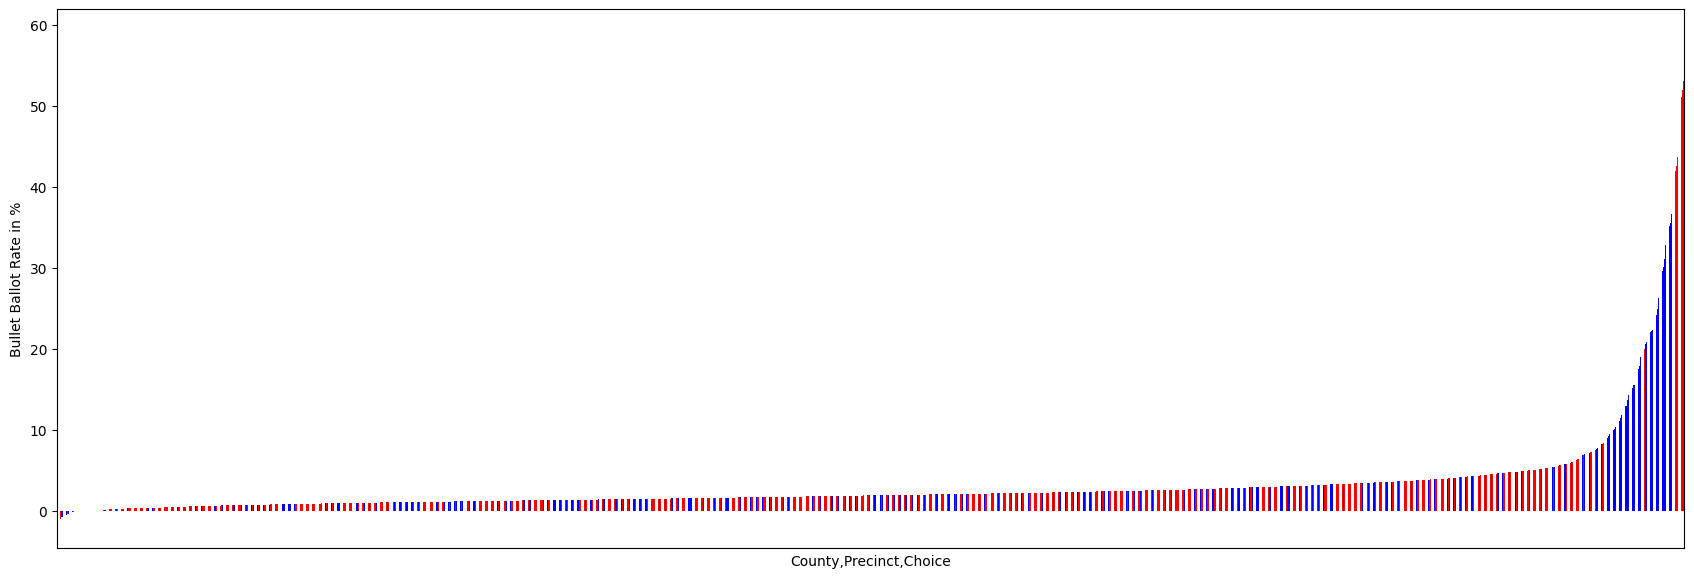

In [91]:

colored_total = colored_total.sort_values("Bullet Ballots %")
colored_total["Bullet Ballots %"].iloc[:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %", color=colored_total["Color"], xlabel="Precinct", xticks=[])

<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballot Rate in %'>

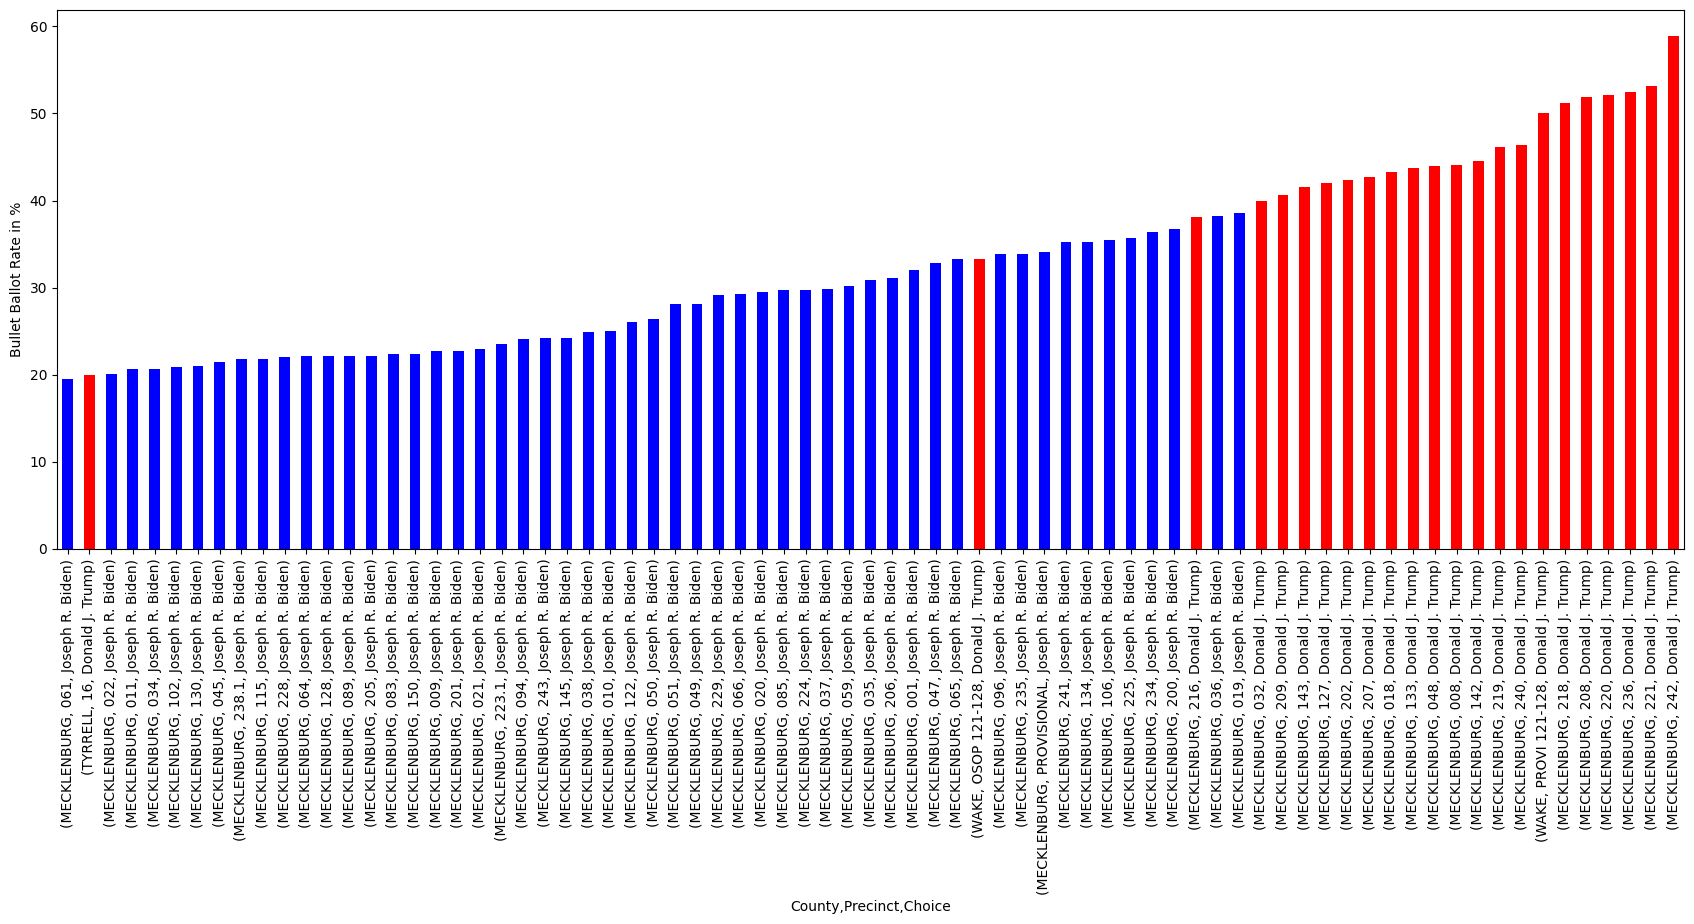

In [92]:
colored_total["Bullet Ballots %"].iloc[-75:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballot Rate in %", color=colored_total["Color"].iloc[-75:])

In [93]:
colored_total["Color"]

County       Precinct  Choice         
BERTIE       IW        Joseph R. Biden    b
ORANGE       RF        Joseph R. Biden    b
WAKE         01-17     Donald J. Trump    r
WILKES       104       Donald J. Trump    r
HALIFAX      CONC      Joseph R. Biden    b
                                         ..
MECKLENBURG  208       Donald J. Trump    r
             220       Donald J. Trump    r
             236       Donald J. Trump    r
             221       Donald J. Trump    r
             242       Donald J. Trump    r
Name: Color, Length: 2991, dtype: object

In [94]:
df_winner.loc["SAMPSON"]

,,Election Date,Contest Group ID,Contest Type,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,Unnamed: 15,Color
Precinct,Choice,,,,,,,,,,,,,
AUTR,Donald J. Trump,11/03/2020,1373,S,REP,1,225,764,44,1,1034,Y,NaN,r
CLCE,Joseph R. Biden,11/03/2020,1373,S,DEM,1,72,431,63,1,567,Y,NaN,b
CLEA,Joseph R. Biden,11/03/2020,1373,S,DEM,1,176,924,145,4,1249,Y,NaN,b
CLEM,Donald J. Trump,11/03/2020,1373,S,REP,1,259,539,44,2,844,Y,NaN,r
CLNE,Donald J. Trump,11/03/2020,1373,S,REP,1,115,798,67,0,980,Y,NaN,r
CLSW,Donald J. Trump,11/03/2020,1373,S,REP,1,95,536,61,0,692,Y,NaN,r
CLWE,Donald J. Trump,11/03/2020,1373,S,REP,1,123,695,82,1,901,Y,NaN,r
GARL,Joseph R. Biden,11/03/2020,1373,S,DEM,1,98,347,32,0,477,Y,NaN,b
GIDD,Donald J. Trump,11/03/2020,1373,S,REP,1,145,300,24,2,471,Y,NaN,r


<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballots'>

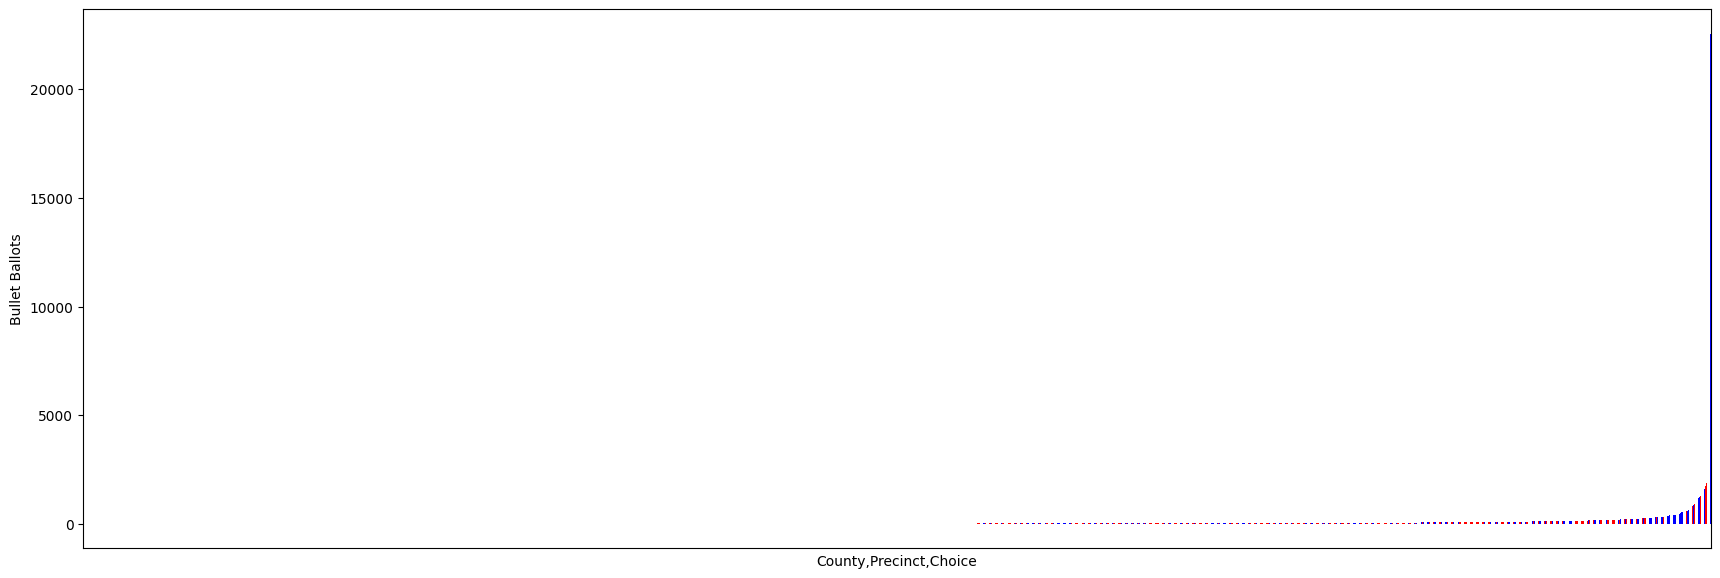

In [95]:
colored_total = colored_total.sort_values("Difference")
colored_total["Difference"].iloc[:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballots", color=colored_total["Color"], xticks=[])

<Axes: xlabel='County,Precinct,Choice', ylabel='Bullet Ballots'>

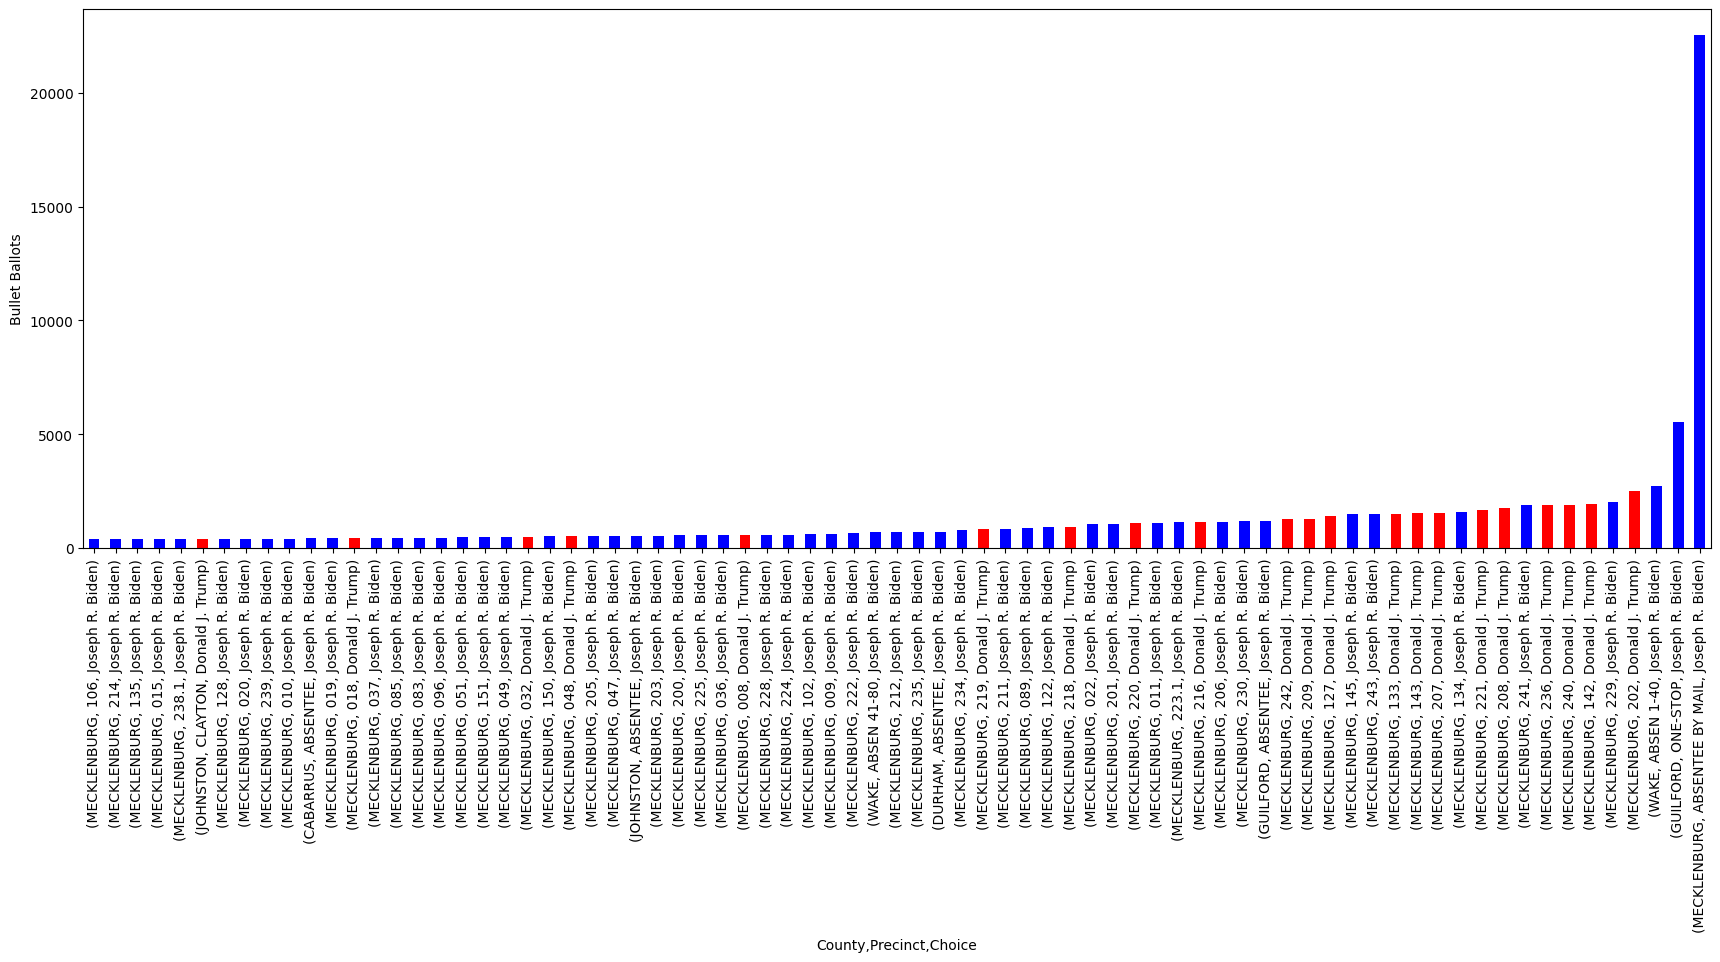

In [96]:
colored_total["Difference"].iloc[-75:].plot.bar(figsize=(21, 7), ylabel="Bullet Ballots", color=colored_total["Color"].iloc[-75:])

In [97]:
# colored_total.groupby(level=(0, 1)).sum()
colored_total.reset_index().groupby("Choice")[["Total Votes President", "Total Votes House", "Difference"]].sum()

,Total Votes President,Total Votes House,Difference
Choice,,,
Donald J. Trump,2962918,2878578,84340
Joseph R. Biden,2561884,2446667,115217
